In [41]:
# 인구 소멸지역을 나타내는 cartogram과 colorgleth(단계 구분도)
# 1. 국가 통계 포털에서 인구정보를 다운로드 
# 2. 기본설정

# 배열 자료구조(행렬 포함), 선형대수, 과학 기술 계산을 위한 패키지
import numpy as np 
# Series, DataFrame(자료구조), 기술통계, 간단한 시각화를 위한 패키지
import pandas as pd 

# 시각화 기본 패키지
import matplotlib.pyplot as plt 

# 그래프에서 한글 처리를 위한 패키지
import platform
from matplotlib import font_manager, rc 

# 데이터 셋과 화려한 시각화를 위한 패키지
import seaborn as sns 
# 데이터 전처리를 위한 패키지
# sklearn 은 데이터셋과 전처리, 머신러닝을 위한 패키지 
from sklearn import preprocessing

# 지도 시각화(단계구분도)를 위한 패키지 
import folium

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

# 음수 사용을 위한 설정
plt.rcParams['axes.unicode_minus'] = False

In [42]:
# 3. 파일열기
population = pd.read_excel('../data/population_raw_data.xlsx', header=1)
print(population)
population.info()

행정구역(동읍면)별(1) 행정구역(동읍면)별(2)         항목           계   20 - 24세   25 - 29세  \
0              전국            소계   총인구수 (명)  51696216.0  3541061.0  3217367.0   
1             NaN           NaN  남자인구수 (명)  25827594.0  1877127.0  1682988.0   
2             NaN           NaN  여자인구수 (명)  25868622.0  1663934.0  1534379.0   
3           서울특별시            소계   총인구수 (명)   9930616.0   690728.0   751973.0   
4             NaN           NaN  남자인구수 (명)   4876789.0   347534.0   372249.0   
..            ...           ...        ...         ...        ...        ...   
841           NaN           NaN  남자인구수 (명)    235977.0    17377.0    13118.0   
842           NaN           NaN  여자인구수 (명)    234688.0    15261.0    12245.0   
843           NaN          서귀포시   총인구수 (명)    170932.0    10505.0     8067.0   
844           NaN           NaN  남자인구수 (명)     86568.0     5600.0     4247.0   
845           NaN           NaN  여자인구수 (명)     84364.0     4905.0     3820.0   

     30 - 34세   35 - 39세   65 - 69세   70 - 

In [43]:
# 4. 결측치 처리

# 이 엑셀 파일에서는 위와 항목이 같은 경우가 NaN
# 전국, 소계 쪽에 NaN 이 있다(값없음)
# 이번 값으로 NA를 채우기
population.fillna(method='ffill', inplace=True)
print(population.head())
population.info()

행정구역(동읍면)별(1) 행정구역(동읍면)별(2)         항목           계   20 - 24세   25 - 29세  \
0            전국            소계   총인구수 (명)  51696216.0  3541061.0  3217367.0   
1            전국            소계  남자인구수 (명)  25827594.0  1877127.0  1682988.0   
2            전국            소계  여자인구수 (명)  25868622.0  1663934.0  1534379.0   
3         서울특별시            소계   총인구수 (명)   9930616.0   690728.0   751973.0   
4         서울특별시            소계  남자인구수 (명)   4876789.0   347534.0   372249.0   

   30 - 34세   35 - 39세   65 - 69세   70 - 74세  75 - 79세  80 - 84세  85 - 89세  \
0   3517868  4016272.0  2237345.0  1781229.0   1457890  909130.0  416164.0   
1   1806754  2045265.0  1072395.0   806680.0    600607  319391.0  113221.0   
2   1711114  1971007.0  1164950.0   974549.0    857283  589739.0  302943.0   
3    803507   817467.0   448956.0   350580.0    251961  141649.0   66067.0   
4    402358   410076.0   211568.0   163766.0    112076   54033.0   19595.0   

   90 - 94세  95 - 99세     100+  
0  141488.0     34844  17562.0 

In [44]:
# 5. 컬럼 이름 변경

# 딕셔너리 형태로 변경전컬럼이름과 변경후컬럼이름을 준다. 
population.rename(columns=
    {'행정구역(동읍면)별(1)':'광역시도', 
    '행정구역(동읍면)별(2)':'시도', 
    '계':'인구수'}, inplace=True)

population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 16 columns):
광역시도        846 non-null object
시도          846 non-null object
항목          846 non-null object
인구수         846 non-null float64
20 - 24세    846 non-null float64
25 - 29세    846 non-null float64
30 - 34세    846 non-null int64
35 - 39세    846 non-null float64
65 - 69세    846 non-null float64
70 - 74세    846 non-null float64
75 - 79세    846 non-null int64
80 - 84세    846 non-null float64
85 - 89세    846 non-null float64
90 - 94세    846 non-null float64
95 - 99세    846 non-null int64
100+        846 non-null float64
dtypes: float64(10), int64(3), object(3)
memory usage: 105.9+ KB


In [45]:
# 6. 시도가 소계인 데이터를 제외

# 제외를 할 때는 drop을 이용해서 삭제 할 수도 있고 필터링을 할 수도 있다. 
# 필터링 (특정한 조건을 제외(!=) 해버리고 싶다. 포함(==))
population=population[(population['시도'] != '소계')] 
print(population.head())

광역시도   시도         항목       인구수  20 - 24세  25 - 29세  30 - 34세  35 - 39세  \
6   서울특별시  종로구   총인구수 (명)  152737.0   11379.0   11891.0     10684   10379.0   
7   서울특별시  종로구  남자인구수 (명)   75201.0    5620.0    6181.0      5387    5034.0   
8   서울특별시  종로구  여자인구수 (명)   77536.0    5759.0    5710.0      5297    5345.0   
9   서울특별시   중구   총인구수 (명)  125249.0    8216.0    9529.0     10332   10107.0   
10  서울특별시   중구  남자인구수 (명)   62204.0    4142.0    4792.0      5192    5221.0   

    65 - 69세  70 - 74세  75 - 79세  80 - 84세  85 - 89세  90 - 94세  95 - 99세  \
6     7411.0    6636.0      5263    3104.0    1480.0     602.0       234   
7     3411.0    3009.0      2311    1289.0     506.0     207.0        89   
8     4000.0    3627.0      2952    1815.0     974.0     395.0       145   
9     6399.0    5313.0      4127    2502.0    1260.0     469.0       158   
10    3113.0    2405.0      1752     929.0     414.0     132.0        56   

     100+  
6   220.0  
7    73.0  
8   147.0  
9   160.0  
10   51.0  


In [46]:
# 7. '항목' 컬럼을 '구분'으로 변경

population.rename(columns={'항목':'구분'}, inplace=True)
population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 792 entries, 6 to 845
Data columns (total 16 columns):
광역시도        792 non-null object
시도          792 non-null object
구분          792 non-null object
인구수         792 non-null float64
20 - 24세    792 non-null float64
25 - 29세    792 non-null float64
30 - 34세    792 non-null int64
35 - 39세    792 non-null float64
65 - 69세    792 non-null float64
70 - 74세    792 non-null float64
75 - 79세    792 non-null int64
80 - 84세    792 non-null float64
85 - 89세    792 non-null float64
90 - 94세    792 non-null float64
95 - 99세    792 non-null int64
100+        792 non-null float64
dtypes: float64(10), int64(3), object(3)
memory usage: 105.2+ KB


In [47]:
# 셀의 값 변경 
# 구분이 '총인구수 (명)' -> 함계
# 구분이 '남자인구수 (명)' -> 남자
# 구분이 '여자인구수 (명)' -> 여자 

# loc로 '구분'의 '총인구수 (명)' 을 찾고 '합계'로 변경
population.loc[population['구분'] =='총인구수 (명)', '구분'] = '합계'
population.loc[population['구분'] =='남자인구수 (명)', '구분'] = '남자'
population.loc[population['구분'] =='여자인구수 (명)', '구분'] = '여자'

print(population['구분'].head())
# 구분 컬럼의 셀들이 변경된 것을 확인할수있다

6     합계
7     남자
8     여자
9     합계
10    남자
Name: 구분, dtype: object


In [48]:
# 8. 청년과 노년을 분리

# 청년과 노년 층으로 새로운 컬럼을 추가 
population['청년'] = (
    population['20 - 24세'] + population['25 - 29세'] + 
    population['30 - 34세'] + population['35 - 39세'])

population['노년'] = (
    population['65 - 69세'] + population['70 - 74세'] + 
    population['75 - 79세'] + population['80 - 84세'] + 
    population['85 - 89세'] + population['90 - 94세'] + 
    population['95 - 99세'] + population['100+'])			

print(population['청년'].head())
print(population['노년'].head())

6     44333.0
7     22222.0
8     22111.0
9     38184.0
10    19347.0
Name: 청년, dtype: float64
6     24950.0
7     10895.0
8     14055.0
9     20388.0
10     8852.0
Name: 노년, dtype: float64


In [49]:
# 9. 피봇테이블 생성

# 기술 통계 값을 확인
# 광역시도와 시도별, 구분 별로 청년과 노년의 값 확인 
pop = pd.pivot_table(population, 
    index=['광역시도', '시도'], 
    columns= '구분', 
    values=['인구수', '청년', '노년'])

print(pop.head())

노년                         인구수                           청년  \
구분             남자       여자       합계        남자        여자        합계       남자   
광역시도 시도                                                                      
강원도  강릉시  15767.0  21912.0  37679.0  106231.0  107615.0  213846.0  26286.0   
     고성군   2900.0   4251.0   7151.0   15899.0   14215.0   30114.0   4494.0   
     동해시   6392.0   8732.0  15124.0   47166.0   46131.0   93297.0  11511.0   
     삼척시   5892.0   8718.0  14610.0   35253.0   34346.0   69599.0   8708.0   
     속초시   5139.0   7613.0  12752.0   40288.0   41505.0   81793.0   9956.0   

                            
구분             여자       합계  
광역시도 시도                     
강원도  강릉시  23098.0  49384.0  
     고성군   2529.0   7023.0  
     동해시   9753.0  21264.0  
     삼척시   7115.0  15823.0  
     속초시   8752.0  18708.0  


In [50]:
# 10. 소멸비율 컬럼을 생성 
# '청년'층 '여자' / '노년'층 '합계' / 2

pop['소멸비율'] = pop['청년', '여자'] / (pop['노년', '합계'] / 2)
print(pop['소멸비율'].head())

광역시도  시도 
강원도   강릉시    1.226041
      고성군    0.707314
      동해시    1.289738
      삼척시    0.973990
      속초시    1.372647
Name: 소멸비율, dtype: float64


In [51]:
# 11. 소멸위기지역 컬럼 생성 
# 소멸비율 < 1.0 True, 아니면 False 

pop['소멸위기지역'] = pop['소멸비율'] < 1.0 
print(pop['소멸위기지역'])

# 소멸위기지역에서 False인 값의 인덱스 두번째 항목을 가져오기
print(pop[pop['소멸위기지역'] == False].index.get_level_values(1))

광역시도  시도 
강원도   강릉시    False
      고성군     True
      동해시    False
      삼척시     True
      속초시    False
             ...  
충청북도  진천군    False
      청원구    False
      청주시    False
      충주시    False
      흥덕구    False
Name: 소멸위기지역, Length: 264, dtype: bool
Index(['강릉시', '동해시', '속초시', '양구군', '원주시', '인제군', '철원군', '춘천시', '태백시', '화천군',
       ...
       '상당구', '서원구', '음성군', '제천시', '증평군', '진천군', '청원구', '청주시', '충주시', '흥덕구'],
      dtype='object', name='시도', length=181)


In [52]:
# 12. 인덱스로 설정되어 있는 광역시도와 시도를 일반 컬럼으로 전환

# 인덱스 제거 
pop.reset_index(inplace=True)
print(pop.head())

광역시도   시도       노년                         인구수                      \
구분                 남자       여자       합계        남자        여자        합계   
0   강원도  강릉시  15767.0  21912.0  37679.0  106231.0  107615.0  213846.0   
1   강원도  고성군   2900.0   4251.0   7151.0   15899.0   14215.0   30114.0   
2   강원도  동해시   6392.0   8732.0  15124.0   47166.0   46131.0   93297.0   
3   강원도  삼척시   5892.0   8718.0  14610.0   35253.0   34346.0   69599.0   
4   강원도  속초시   5139.0   7613.0  12752.0   40288.0   41505.0   81793.0   

         청년                        소멸비율 소멸위기지역  
구분       남자       여자       합계                   
0   26286.0  23098.0  49384.0  1.226041  False  
1    4494.0   2529.0   7023.0  0.707314   True  
2   11511.0   9753.0  21264.0  1.289738  False  
3    8708.0   7115.0  15823.0  0.973990   True  
4    9956.0   8752.0  18708.0  1.372647  False  


In [53]:
# 13. 2단(위아래)으로 구성된 컬럼이름을 하나의 컬럼이름으로 합치기  

# 컬럼 이름 만들기 - 컬럼이 2레벨(두번째)로 되어 있어서 위 아래 레벨을 합치는 작업
# '청년' 의 '남자', '여자', '합계' 를 청년남자, 청년여자, 청년합계 방식으로 합치기
tmp_columns = [pop.columns.get_level_values(0)[n] + pop.columns.get_level_values(1)[n]for n in range(0, len(pop.columns.get_level_values(0)))]
print(tmp_columns)

['광역시도', '시도', '노년남자', '노년여자', '노년합계', '인구수남자', '인구수여자', '인구수합계', '청년남자', '청년여자', '청년합계', '소멸비율', '소멸위기지역']


In [54]:
# 만들어놓은 컬럼을 대입
pop.columns = tmp_columns
print(pop.head())

광역시도   시도     노년남자     노년여자     노년합계     인구수남자     인구수여자     인구수합계     청년남자  \
0  강원도  강릉시  15767.0  21912.0  37679.0  106231.0  107615.0  213846.0  26286.0   
1  강원도  고성군   2900.0   4251.0   7151.0   15899.0   14215.0   30114.0   4494.0   
2  강원도  동해시   6392.0   8732.0  15124.0   47166.0   46131.0   93297.0  11511.0   
3  강원도  삼척시   5892.0   8718.0  14610.0   35253.0   34346.0   69599.0   8708.0   
4  강원도  속초시   5139.0   7613.0  12752.0   40288.0   41505.0   81793.0   9956.0   

      청년여자     청년합계      소멸비율  소멸위기지역  
0  23098.0  49384.0  1.226041   False  
1   2529.0   7023.0  0.707314    True  
2   9753.0  21264.0  1.289738   False  
3   7115.0  15823.0  0.973990    True  
4   8752.0  18708.0  1.372647   False  


In [55]:
# 14. 광역시도 시도 이름 합치기 

# 시도 이름을 확인 
# '광역시도'는 다르지만 '시도'가 같은 지역이 있어서 주의가 필요하다. 
print(pop['시도'].unique())

['강릉시' '고성군' '동해시' '삼척시' '속초시' '양구군' '양양군' '영월군' '원주시' '인제군' '정선군' '철원군'
 '춘천시' '태백시' '평창군' '홍천군' '화천군' '횡성군' '가평군' '고양시' '과천시' '광명시' '광주시' '구리시'
 '군포시' '권선구' '기흥구' '김포시' '남양주시' '단원구' '덕양구' '동두천시' '동안구' '만안구' '부천시' '분당구'
 '상록구' '성남시' '소사구' '수원시' '수정구' '수지구' '시흥시' '안산시' '안성시' '안양시' '양주시' '양평군'
 '여주시' '연천군' '영통구' '오산시' '오정구' '용인시' '원미구' '의왕시' '의정부시' '이천시' '일산동구'
 '일산서구' '장안구' '중원구' '처인구' '파주시' '팔달구' '평택시' '포천시' '하남시' '화성시' '거제시' '거창군'
 '김해시' '남해군' '마산합포구' '마산회원구' '밀양시' '사천시' '산청군' '성산구' '양산시' '의령군' '의창구'
 '진주시' '진해구' '창녕군' '창원시' '통영시' '하동군' '함안군' '함양군' '합천군' '경산시' '경주시' '고령군'
 '구미시' '군위군' '김천시' '남구' '문경시' '봉화군' '북구' '상주시' '성주군' '안동시' '영덕군' '영양군'
 '영주시' '영천시' '예천군' '울릉군' '울진군' '의성군' '청도군' '청송군' '칠곡군' '포항시' '광산구' '동구'
 '서구' '달서구' '달성군' '수성구' '중구' '대덕구' '유성구' '강서구' '금정구' '기장군' '동래구' '부산진구'
 '사상구' '사하구' '수영구' '연제구' '영도구' '해운대구' '강남구' '강동구' '강북구' '관악구' '광진구' '구로구'
 '금천구' '노원구' '도봉구' '동대문구' '동작구' '마포구' '서대문구' '서초구' '성동구' '성북구' '송파구' '양천구'
 '영등포구' '용산구' '은평구' '종로구' '중랑구' '세종특별자치시' '울주군' '강화군' '

In [56]:
# 시도 이름 만들기
si_name = [None] * len(pop)

# 광역시가 아닌 곳 중에 구를 가지고 있는 곳의 디셔너리 만들기 
tmp_gu_dict = {'수원':['장안구', '권선구', '팔달구', '영통구'],
    '성남':['수정구', '중원구', '분당구'],
    '안양':['만안구', '동안구'],
    '안산':['상록구', '단원구'],
    '고양':['덕양구', '일산동구', '일산서구'],
    '용인':['처인구', '기흥구', '수지구'],
    '청주':['상당구', '서원구', '흥덕구', '청원구'],
    '천안':['동남구', '서북구'],
    '전주':['완산구', '덕진구'],
    '포항':['남구', '북구'],
    '창원':['의창구', '성산구', '진해구', '마산합포구', '마산회원구'],
    '부천':['오정구', '원미구', '소사구']}

# 시도 고유 이름 만들기 
for n in pop.index :

    # ~광역시, ~특별시, ~자치시로 끝나지 않는  
    if pop['광역시도'][n][-3: ] not in ['광역시', '특별시', '자치시'] :
        # 중복된 지역인 '고성'에 대한 처리 
        if pop['시도'][n][:-1] == '고성' and pop['광역시도'][n] == '강원도' :
            si_name[n] = '고성(강원)'
        elif pop['시도'][n][:-1]=='고성' and pop['광역시도'][n]=='경상남도':
            si_name[n] = '고성(경남)'
        else:
            si_name[n] = pop['시도'][n][:-1]

            # 광역시 특별시 자치시가 아닌데 구를 가지고 있는곳 처리 
        for keys, values in tmp_gu_dict.items():
            if pop['시도'][n] in values:
                if len(pop['시도'][n])==2:
                    si_name[n] = keys + ' ' + pop['시도'][n]
                elif pop['시도'][n] in ['마산합포구','마산회원구']:
                    si_name[n] = keys + ' ' + pop['시도'][n][2:-1]
                else:
                    si_name[n] = keys + ' ' + pop['시도'][n][:-1]
    elif pop['광역시도'][n] == '세종특별자치시':
         si_name[n] = '세종'
    else:
        if len(pop['시도'][n])==2:
            si_name[n] = pop['광역시도'][n][:2] + ' ' + pop['시도'][n]
        else:
            si_name[n] = pop['광역시도'][n][:2] + ' ' + pop['시도'][n][:-1]

print(si_name)

['강릉', '고성(강원)', '동해', '삼척', '속초', '양구', '양양', '영월', '원주', '인제', '정선', '철원', '춘천', '태백', '평창', '홍천', '화천', '횡성', '가평', '고양', '과천', '광명', '광주', '구리', '군포', '수원 권선', '용인 기흥', '김포', '남양주', '안산 단원', '고양 덕양', '동두천', '안양 동안', '안양 만안', '부천', '성남 분당', '안산 상록', '성남', '부천 소사', '수원', '성남 수정', '용인 수지', '시흥', '안산', '안성', '안양', '양주', '양평', '여주', '연천', '수원 영통', '오산', '부천 오정', '용인', '부천 원미', '의왕', '의정부', '이천', '고양 일산동', '고양 일산서', '수원 장안', '성남 중원', '용인 처인', '파주', '수원 팔달', '평택', '포천', '하남', '화성', '거제', '거창', '고성(경남)', '김해', '남해', '창원 합포', '창원 회원', '밀양', '사천', '산청', '창원 성산', '양산', '의령', '창원 의창', '진주', '창원 진해', '창녕', '창원', '통영', '하동', '함안', '함양', '합천', '경산', '경주', '고령', '구미', '군위', '김천', '포항 남구', '문경', '봉화', '포항 북구', '상주', '성주', '안동', '영덕', '영양', '영주', '영천', '예천', '울릉', '울진', '의성', '청도', '청송', '칠곡', '포항', '광주 광산', '광주 남구', '광주 동구', '광주 북구', '광주 서구', '대구 남구', '대구 달서', '대구 달성', '대구 동구', '대구 북구', '대구 서구', '대구 수성', '대구 중구', '대전 대덕', '대전 동구', '대전 서구', '대전 유성', '대전 중구', '부산 강서', '부산 금정', '부산 기장', '부산 남구', '부산 동

In [57]:
# 15. 도시이름을 pop에 새로운 컬럼으로 추가 

pop['ID'] = si_name
print(pop['ID'])

0          강릉
1      고성(강원)
2          동해
3          삼척
4          속초
        ...  
259        진천
260     청주 청원
261        청주
262        충주
263     청주 흥덕
Name: ID, Length: 264, dtype: object


In [58]:
# 현재 상태 확인 
print(pop.info())
print(pop.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 14 columns):
광역시도      264 non-null object
시도        264 non-null object
노년남자      264 non-null float64
노년여자      264 non-null float64
노년합계      264 non-null float64
인구수남자     264 non-null float64
인구수여자     264 non-null float64
인구수합계     264 non-null float64
청년남자      264 non-null float64
청년여자      264 non-null float64
청년합계      264 non-null float64
소멸비율      264 non-null float64
소멸위기지역    264 non-null bool
ID        264 non-null object
dtypes: bool(1), float64(10), object(3)
memory usage: 27.2+ KB
None
  광역시도   시도     노년남자     노년여자     노년합계     인구수남자     인구수여자     인구수합계     청년남자  \
0  강원도  강릉시  15767.0  21912.0  37679.0  106231.0  107615.0  213846.0  26286.0   
1  강원도  고성군   2900.0   4251.0   7151.0   15899.0   14215.0   30114.0   4494.0   
2  강원도  동해시   6392.0   8732.0  15124.0   47166.0   46131.0   93297.0  11511.0   
3  강원도  삼척시   5892.0   8718.0  14610.0   35253.0   34346.0   69599.0   8708

In [59]:
# 16. 지도 정보를 가진 Excel 파일 읽기

draw_korea_raw = pd.read_excel('../data/draw_korea_raw.xlsx', encoding='cp949')
print(draw_korea_raw)

0      1      2       3       4       5      6       7      8      9   \
0     NaN    NaN    NaN     NaN     NaN     NaN    NaN      철원     화천     양구   
1     NaN    NaN    NaN      양주     동두천      연천     포천     의정부     인제     춘천   
2     NaN    NaN    NaN   고양 덕양  고양 일산동   서울 도봉  서울 노원     남양주     홍천     횡성   
3     NaN    NaN     파주  고양 일산서      김포   서울 강북  서울 성북      가평     구리     하남   
4     NaN    NaN  부천 소사   안양 만안      광명  서울 서대문  서울 종로  서울 동대문  서울 중랑     양평   
5     NaN  인천 강화  부천 원미   안양 동안   서울 은평   서울 마포  서울 중구   서울 성동  서울 강동     여주   
6     NaN  인천 서구  부천 오정      시흥   서울 강서   서울 동작  서울 용산   서울 광진  서울 송파     이천   
7     NaN  인천 동구  인천 계양   안산 상록   서울 양천   서울 관악  서울 서초   성남 중원     과천     광주   
8     NaN    NaN  인천 부평   안산 단원  서울 영등포   서울 금천  서울 강남   성남 분당  성남 수정  용인 수지   
9     NaN  인천 중구  인천 남구      화성   서울 구로      군포     의왕   수원 영통  용인 기흥  용인 처인   
10  인천 옹진  인천 연수  인천 남동      오산      안성   수원 권선  수원 장안      제천     예천     영주   
11     태안     아산  천안 동남   천안 서북      평택      음성

In [60]:
# 17. 각 셀의 위치를 좌표로 만들기

# 컬럼이름이 일련번호로 되어 있다. 
# 일련번호를 좌표로 사용할것이다
# stack 함수를 이용해서 컬럼이름을 인덱스로 만들기 

draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())
print(draw_korea_raw_stacked) 

0
0  7       철원
   8       화천
   9       양구
   10  고성(강원)
1  3       양주
...       ...
24 2       장흥
   3       보성
25 2       완도
   5       제주
26 5      서귀포

[252 rows x 1 columns]


In [61]:
# 인덱스를 초기화해서 인덱스가 컬럼이 되도록 하기
# 인덱스를 컬럼 level_0, level_1로 꺼냈다 (컬럼 1개 -> 컬럼3개)

draw_korea_raw_stacked.reset_index(inplace=True)
print(draw_korea_raw_stacked)

level_0  level_1       0
0          0        7      철원
1          0        8      화천
2          0        9      양구
3          0       10  고성(강원)
4          1        3      양주
..       ...      ...     ...
247       24        2      장흥
248       24        3      보성
249       25        2      완도
250       25        5      제주
251       26        5     서귀포

[252 rows x 3 columns]


In [62]:
print(draw_korea_raw_stacked.head(30))

level_0  level_1       0
0         0        7      철원
1         0        8      화천
2         0        9      양구
3         0       10  고성(강원)
4         1        3      양주
5         1        4     동두천
6         1        5      연천
7         1        6      포천
8         1        7     의정부
9         1        8      인제
10        1        9      춘천
11        1       10      속초
12        2        3   고양 덕양
13        2        4  고양 일산동
14        2        5   서울 도봉
15        2        6   서울 노원
16        2        7     남양주
17        2        8      홍천
18        2        9      횡성
19        2       10      양양
20        3        2      파주
21        3        3  고양 일산서
22        3        4      김포
23        3        5   서울 강북
24        3        6   서울 성북
25        3        7      가평
26        3        8      구리
27        3        9      하남
28        3       10      정선
29        3       11      강릉


In [63]:
# 좌표로 사용하기 위해서 컬럼이름 변경
# 'level_0' -> 'y', 'level-1' -> 'x', 0 -> 'ID' 로 변경 
draw_korea_raw_stacked.rename(columns= {'level_0':'y', 'level_1':'x', 0 : 'ID'}, inplace=True)
print(draw_korea_raw_stacked)

y   x      ID
0     0   7      철원
1     0   8      화천
2     0   9      양구
3     0  10  고성(강원)
4     1   3      양주
..   ..  ..     ...
247  24   2      장흥
248  24   3      보성
249  25   2      완도
250  25   5      제주
251  26   5     서귀포

[252 rows x 3 columns]


In [64]:
# 18. 지도 그리기 

# 경계선 만들기 위한 좌표 생성
BORDER_LINES = [
    [(5, 1), (5,2), (7,2), (7,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9),
    (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7),
    (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4),
    (11,4), (11,3)], # 경기도
    [(8,10), (8,11), (6,11), (6,12)], # 강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5),
    (15,4), (16,4), (16,2)], # 충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6),
    (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
    [(13,5), (13,6), (16,6)], # 대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
    # [(9,14), (9,15)],
    [(27,5), (27,6), (25,6)],
    ]

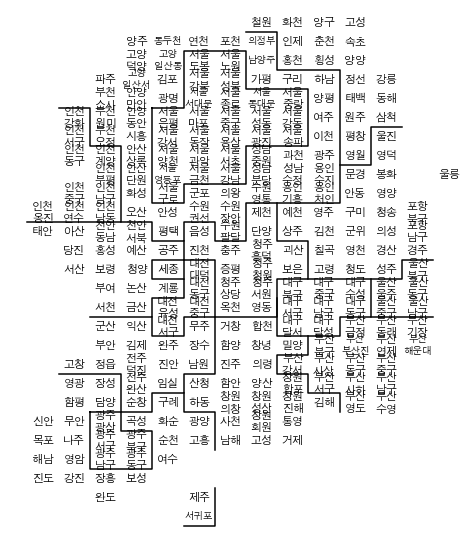

In [65]:
# 19. 

plt.figure(figsize=(8,10))
# 지역 이름 표시
for idx, row in draw_korea_raw_stacked.iterrows():
    # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시
    # (중구, 서구)
    if len(row['ID'].split())==2:
        dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
    elif row['ID'][:2]=='고성':
        dispname = '고성'
    else:
        dispname = row['ID']

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
    if len(dispname.splitlines()[-1]) >= 3: 
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2
    # 글자 작성 
    plt.annotate(dispname,(row['x']+0.5, row['y']+0.5), weight='bold', fontsize=fontsize, ha='center', va='center', linespacing=linespacing)         

# 시도 경계 그린다.
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)

# 상하 뒤집기 - 엑셀은 하단으로 갈때 좌표가 증가하지만
# 모니터는 상단으로 갈때 좌표가 증가한다. 

plt.gca().invert_yaxis()
# 축제거
plt.axis('off')
plt.show()

In [66]:
print(pop[pop['ID'] == '서울 강남'])

광역시도   시도     노년남자     노년여자     노년합계     인구수남자     인구수여자     인구수합계  \
151  서울특별시  강남구  27849.0  33973.0  61822.0  271604.0  295511.0  567115.0   

        청년남자     청년여자      청년합계      소멸비율  소멸위기지역     ID  
151  83476.0  94421.0  177897.0  3.054608   False  서울 강남  


In [67]:
print(draw_korea_raw_stacked[draw_korea_raw_stacked['ID'] == '서울 강남'])

y  x     ID
77  8  6  서울 강남


In [68]:
# 20. pop의 ID와 draw_korea_raw_stacked 의 ID 불일치 찾기

# pop의 ID와 draw_korea_raw_stacked 의 ID 불일치 찾기 
# print(pop.head())
print(set(draw_korea_raw_stacked['ID'].unique()) - set(pop['ID'].unique()))
print()
print(set(pop['ID'].unique()) - set(draw_korea_raw_stacked['ID'].unique()))

set()

{'청주', '용인', '포항', '고양', '부천', '천안', '성남', '안산', '창원', '전주', '안양', '수원'}


In [69]:
# pop에는 있는데 draw에는 없는 데이터 제거할 리스트 만들기
del_list = list(set(pop['ID'].unique()) - set(draw_korea_raw_stacked['ID'].unique()))

# 리스트를 순회하면서 데이터를 제거 
for rownum in del_list :
    pop = pop.drop(pop[pop['ID'] == rownum].index)

In [70]:
# 더이상 불일치한 데이터가 나오면 안됨 
print(set(pop['ID'].unique()) - set(draw_korea_raw_stacked['ID'].unique()))
# set - 합집합, 교집합, 차집합 을 할 수 있음.

set()


In [71]:
# 21. pop와 darq_korea_raw_stacked 를 join

pop = pd.merge(pop, draw_korea_raw_stacked, how='inner', on=['ID'])
print(pop.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 251
Data columns (total 16 columns):
광역시도      252 non-null object
시도        252 non-null object
노년남자      252 non-null float64
노년여자      252 non-null float64
노년합계      252 non-null float64
인구수남자     252 non-null float64
인구수여자     252 non-null float64
인구수합계     252 non-null float64
청년남자      252 non-null float64
청년여자      252 non-null float64
청년합계      252 non-null float64
소멸비율      252 non-null float64
소멸위기지역    252 non-null bool
ID        252 non-null object
y         252 non-null int64
x         252 non-null int64
dtypes: bool(1), float64(10), int64(2), object(3)
memory usage: 31.7+ KB
None


In [72]:
# 22. 좌표와 인구수를 가지고 pivot 테이블 만들기 

mapdata = pop.pivot_table(index='y', columns='x', values='인구수합계')
print(mapdata)

x         0         1              2         3         4         5         6   \
y                                                                               
0        NaN       NaN            NaN       NaN       NaN       NaN       NaN   
1        NaN       NaN            NaN  205513.0   98277.0   45907.0  154763.0   
2        NaN       NaN            NaN  446233.0  292612.0  348220.0  567581.0   
3        NaN       NaN  430781.000000  300839.0  363443.0  327195.0  450355.0   
4        NaN       NaN  283793.333333  252353.0  339484.0  314194.0  152737.0   
5        NaN   68010.0  283793.333333  345061.0  491476.0  379892.0  125249.0   
6        NaN  510733.0  283793.333333  402888.0  595485.0  400997.0  230241.0   
7        NaN   71014.0  330284.000000  375857.0  477739.0  506851.0  447192.0   
8        NaN       NaN  549716.000000  314002.0  370613.0  235386.0  567115.0   
9        NaN  115249.0  417103.000000  640890.0  417551.0  284890.0  156763.0   
10   21351.0  328627.0  5309

In [73]:
# NaN 제거를 위한 작업

masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
print(masked_mapdata)

[[-- -- -- -- -- -- -- 48013.0 26264.0 24010.0 30114.0 -- -- --]
 [-- -- -- 205513.0 98277.0 45907.0 154763.0 438457.0 32720.0 280707.0
  81793.0 -- -- --]
 [-- -- -- 446233.0 292612.0 348220.0 567581.0 662154.0 70076.0 45991.0
  27218.0 -- -- --]
 [-- -- 430781.0 300839.0 363443.0 327195.0 450355.0 62448.0 193763.0
  211101.0 38718.0 213846.0 -- --]
 [-- -- 283793.3333333333 252353.0 339484.0 314194.0 152737.0 355069.0
  411005.0 111367.0 47070.0 93297.0 -- --]
 [-- 68010.0 283793.3333333333 345061.0 491476.0 379892.0 125249.0
  299259.0 444168.0 111563.0 337979.0 69599.0 -- --]
 [-- 510733.0 283793.3333333333 402888.0 595485.0 400997.0 230241.0
  357215.0 657831.0 210359.0 43318.0 51738.0 -- --]
 [-- 71014.0 330284.0 375857.0 477739.0 506851.0 447192.0 237909.0
  63778.0 327723.0 40073.0 39052.0 -- --]
 [-- -- 549716.0 314002.0 370613.0 235386.0 567115.0 503830.0 232841.0
  347833.0 74702.0 33539.0 -- 10001.0]
 [-- 115249.0 417103.0 640890.0 417551.0 284890.0 156763.0 340654.0
  4171

In [74]:
# 23. 컬럼이름과 dataframe 그리고 색상 이름을 대입하면 catogram을 그려주는 함수 

def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    #인구수 데이터의 크고 낮음을 분류하기 위한 값 만들기
    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData]))*0.25 + min(blockedMap[targetData])
    #컬럼이름을 대입하기
    datalabel = targetData
    #최대값과 최소값 구하기
    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])
    #x 와 y를 가지고 피봇 테이블 만들기
    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    #데이터가 존재하는 것 골라내기
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    #그래프 영역 크기 만들기
    plt.figure(figsize=(9, 11))
    # 색상 설정
    # 지도에 색상을 설정
    plt.pcolor(masked_mapdata, 
        vmin=vmin, 
        vmax=vmax, 
        cmap=cmapname, 
        edgecolor='#aaaaaa', 
        linewidth=0.5)
    
    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시
        # (중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']
        
        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.
        #글자색상 만들기
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        #텍스트 출력하기
        plt.annotate(dispname, 
                (row['x']+0.5, row['y']+0.5), 
                weight='bold', 
                fontsize=fontsize, 
                ha='center', 
                va='center', 
                color=annocolor,
                linespacing=linespacing)

        # 시도 경계 그리기
    for path in BORDER_LINES:
        ys, xs = zip(*path)
            
    plt.plot(xs, ys, c='black', lw=2)
    plt.gca().invert_yaxis()
    plt.axis('off')
        
    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)
        
    plt.tight_layout()
    plt.show()

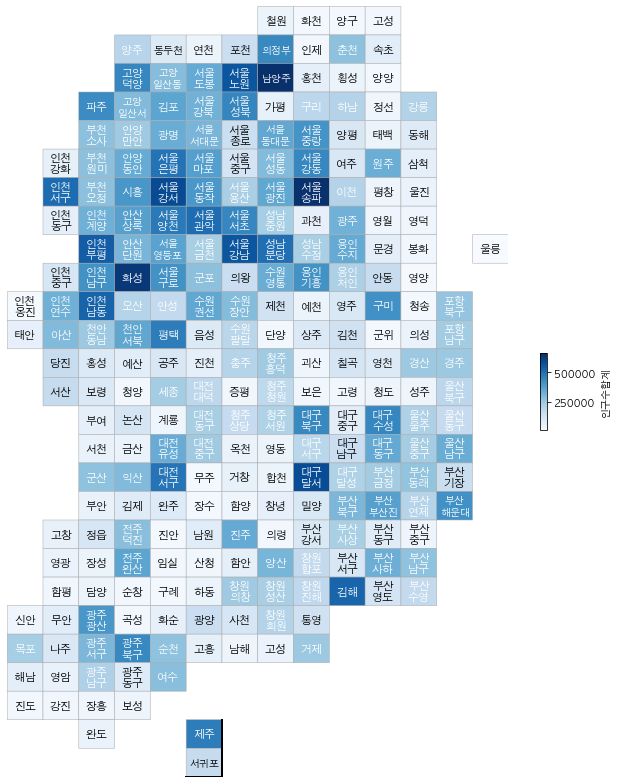

In [75]:
drawKorea('인구수합계', pop, 'Blues')

In [76]:
print(pop.head())

광역시도   시도     노년남자     노년여자     노년합계     인구수남자     인구수여자     인구수합계     청년남자  \
0  강원도  강릉시  15767.0  21912.0  37679.0  106231.0  107615.0  213846.0  26286.0   
1  강원도  고성군   2900.0   4251.0   7151.0   15899.0   14215.0   30114.0   4494.0   
2  강원도  동해시   6392.0   8732.0  15124.0   47166.0   46131.0   93297.0  11511.0   
3  강원도  삼척시   5892.0   8718.0  14610.0   35253.0   34346.0   69599.0   8708.0   
4  강원도  속초시   5139.0   7613.0  12752.0   40288.0   41505.0   81793.0   9956.0   

      청년여자     청년합계      소멸비율  소멸위기지역      ID  y   x  
0  23098.0  49384.0  1.226041   False      강릉  3  11  
1   2529.0   7023.0  0.707314    True  고성(강원)  0  10  
2   9753.0  21264.0  1.289738   False      동해  4  11  
3   7115.0  15823.0  0.973990    True      삼척  5  11  
4   8752.0  18708.0  1.372647   False      속초  1  10  


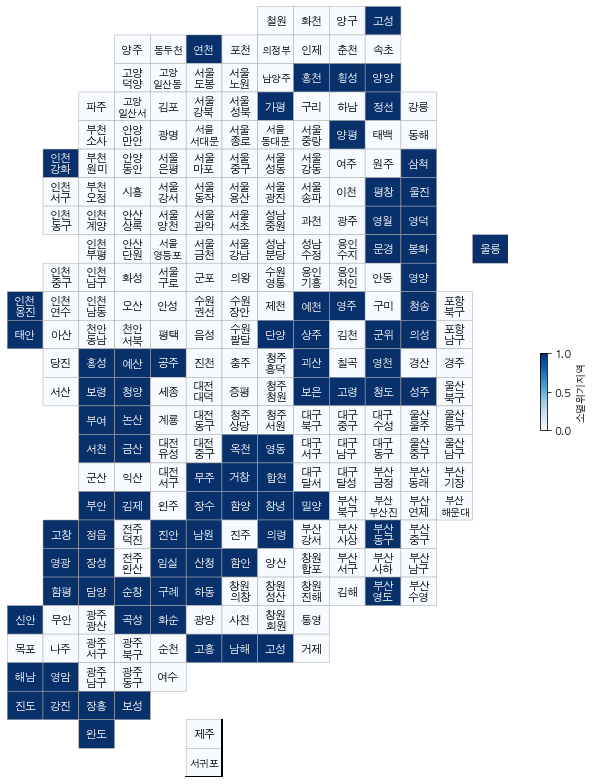

In [77]:
# 소멸위기지역을 수치 데이터로 변환 - True:1, False:0
pop['소멸위기지역'] = [1 if imsi else 0 for imsi in pop['소멸위기지역']]
drawKorea('소멸위기지역', pop, 'Blues')

In [78]:
#단계 구분도를 위한 라이브러리 
import folium
import json 

# 데이터에서 지역이름을 인덱스로 설정
pop_folium = pop.set_index('ID')
print(pop_folium)

광역시도   시도     노년남자     노년여자     노년합계     인구수남자     인구수여자     인구수합계  \
ID                                                                           
강릉       강원도  강릉시  15767.0  21912.0  37679.0  106231.0  107615.0  213846.0   
고성(강원)   강원도  고성군   2900.0   4251.0   7151.0   15899.0   14215.0   30114.0   
동해       강원도  동해시   6392.0   8732.0  15124.0   47166.0   46131.0   93297.0   
삼척       강원도  삼척시   5892.0   8718.0  14610.0   35253.0   34346.0   69599.0   
속초       강원도  속초시   5139.0   7613.0  12752.0   40288.0   41505.0   81793.0   
...      ...  ...      ...      ...      ...       ...       ...       ...   
증평      충청북도  증평군   2206.0   3117.0   5323.0   19110.0   18198.0   37308.0   
진천      충청북도  진천군   4731.0   6575.0  11306.0   36387.0   33563.0   69950.0   
청주 청원   충청북도  청원구   8417.0  11914.0  20331.0   97006.0   93807.0  190813.0   
충주      충청북도  충주시  14407.0  20383.0  34790.0  104877.0  103473.0  208350.0   
청주 흥덕   충청북도  흥덕구   9788.0  13671.0  23459.0  127647.0  125916.0  253563

In [79]:
# 표시하고자하는 지도의 경계선 데이터를 가져옵니다. 
geo_str = json.load(open('../data/korea_geo_simple.json'))
print(geo_str)

5.090574508247194], [129.00669618115077, 35.075352708596135], [129.00355071666198, 35.045119629348555], [128.9843930332529, 35.044665657334356], [128.96921882636354, 35.030178209294], [128.95315522216924, 35.07492543907081], [128.92339448893222, 35.08335895052933], [128.93515428134134, 35.107196230446924], [128.95913076036766, 35.124219702379115], [128.9820777040685, 35.11366639930547], [129.00022374007818, 35.11946099639376]]]}}, {'type': 'Feature', 'id': '부산 해운대', 'properties': {'code': '21090', 'name': '해운대구', 'name_eng': 'Haeundae-gu', 'base_year': '2013'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[129.11230628758815, 35.20703612721303], [129.14655608246483, 35.247653331651605], [129.17178499322435, 35.223012034403986], [129.15946955367855, 35.2060010318845], [129.1712609088194, 35.19779178977021], [129.20926574987496, 35.193858050365115], [129.2101963573097, 35.178863012450506], [129.19648542084465, 35.15813806486568], [129.13960138849424, 35.15372074477251], [129.13301266

In [80]:
# 지도 출력
map = folium.Map(location=[36.2002, 127.054], zoom_start=7)

map.choropleth(geo_data = geo_str, 
    data = pop_folium['인구수합계'], 
    fill_color='YlGnBu', 
    key_on='feature.id', 
    columns=[pop_folium.index, pop_folium['인구수합계']])

map
#map.save('pop.html')